# Question1: Spectrogram of Audio File

In [30]:
#import all the libraries

import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Audio file 

In [31]:
audio = "record.wav" #record audio file 
ipd.Audio(audio)

In [32]:
x, sr = librosa.load(audio) #load audio file


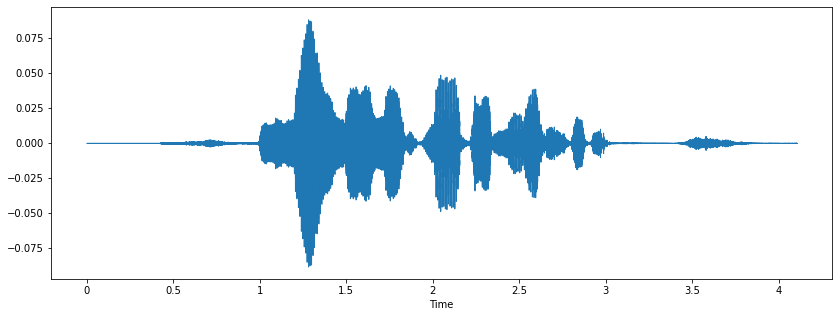

In [33]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x,sr=sr)

# Extraction Of Short-Time Fourier Transform


In [34]:
FrameSize = 2048
HopSize = 512
Sx = librosa.stft(x, n_fft=FrameSize, hop_length=HopSize)
Sx.shape


(1025, 177)

# Calculating the spectrogram

In [35]:
Y_scale = np.abs(Sx) ** 2

# Visualizing the spectrogram


In [36]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

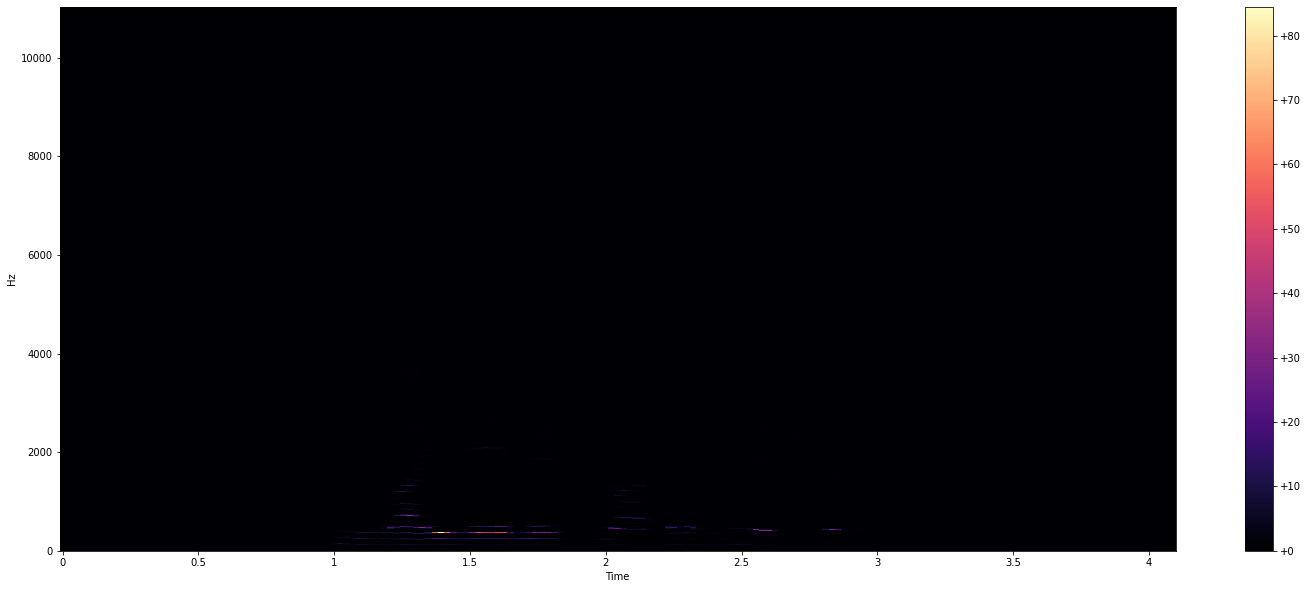

In [37]:
plot_spectrogram(Y_scale, sr, HopSize)


# Log-Amplitude Spectrogram

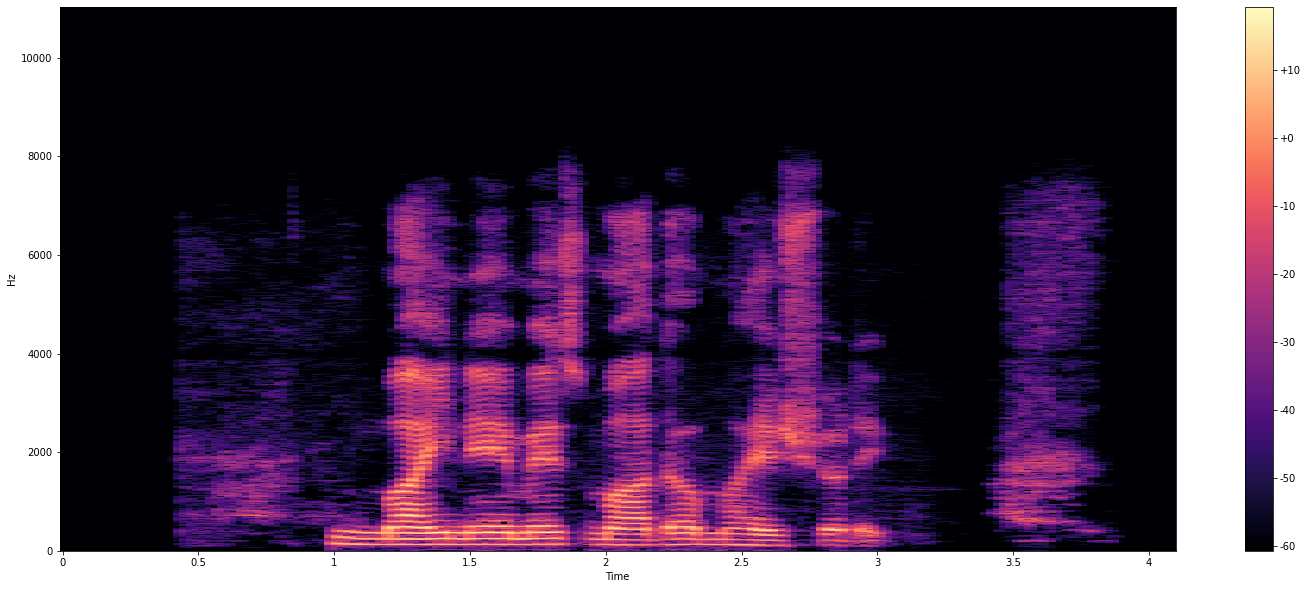

In [38]:
Y_Log_Scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_Log_Scale, sr, HopSize)


# Log-Frequency Spectrogram

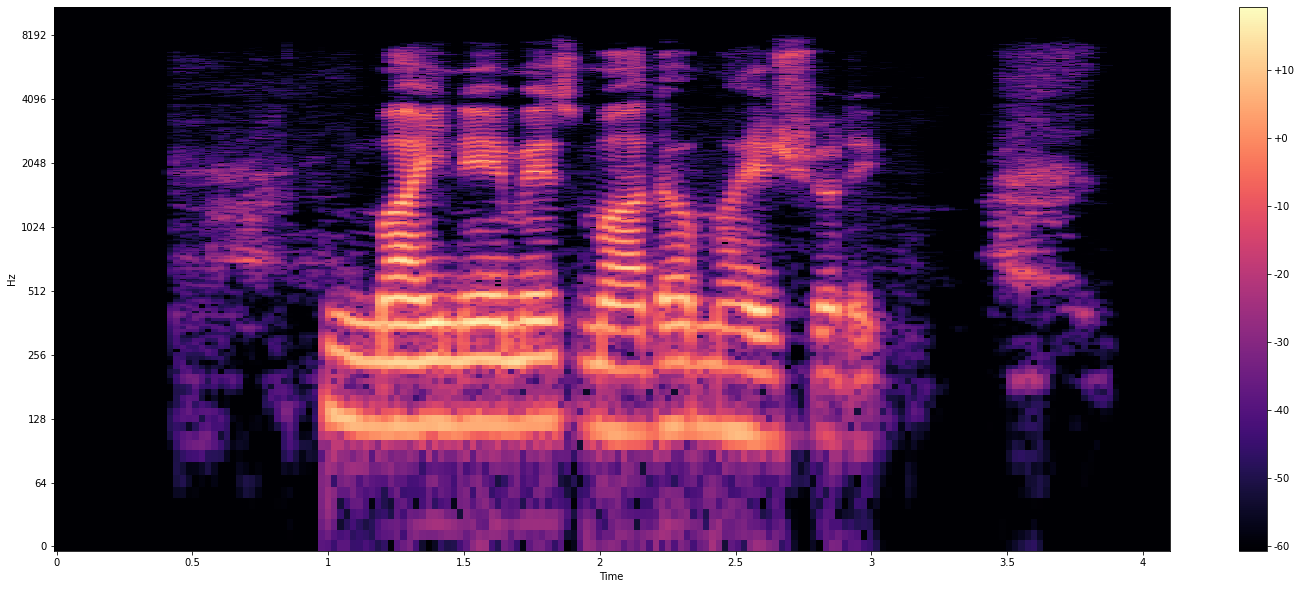

In [39]:
plot_spectrogram(Y_Log_Scale, sr, HopSize, y_axis="log")


In this spectrogram, I have observed that for each word there is one spectrum made within the frequency limit shown in the spectogram.

# Question 2: Implementing a Human Posture Detection App

# Part-a

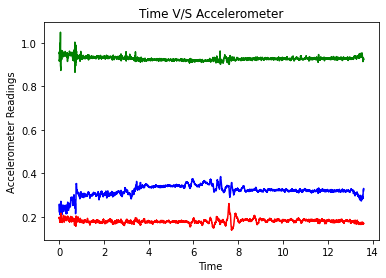

In [40]:
data = pd.read_csv('sitting.csv') #read sitting file

x = data['time'].tolist() #list of time column
gFx = data['gFx'].tolist() #list of Accelerometer in x-direction
gFy = data['gFy'].tolist() #list of Accelerometer in y-direction
gFz = data['gFz'].tolist() #list of Accelerometer in z-direction

plt.plot(x, gFx, color = "blue") #plot x-direction values
plt.plot(x, gFy, color = "red") #plot y-direction values
plt.plot(x, gFz, color = "green") #plot z-direction values

plt.xlabel('Time ') #Time on x-axis

plt.ylabel('Accelerometer Readings') # Accelerometer reading on y-axis
plt.title('Time V/S Accelerometer')


plt.show()

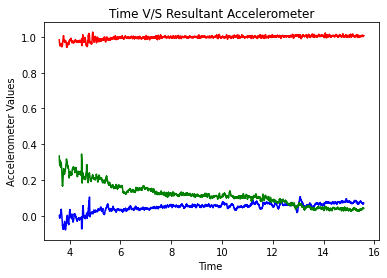

In [41]:
reading = pd.read_csv('standing.csv') #read standing data
x = reading['time'].tolist() #list of time column
x=x[1500:6500] #Manually select the data to remove noise

gFx = reading['gFx'].tolist() #list of Accelerometer in x-direction
gFy = reading['gFy'].tolist() #list of Accelerometer in y-direction
gFz = reading['gFz'].tolist() #list of Accelerometer in z-direction

plt.plot(x, gFx[1500:6500], color="blue") #plot x-direction values
plt.plot(x, gFy[1500:6500], color= "red") #plot y-direction values
plt.plot(x, gFz[1500:6500], color = "green") #plot z-direction values

plt.xlabel('Time ')

plt.ylabel('Accelerometer Values')

plt.title('Time V/S Resultant Accelerometer')

plt.show()

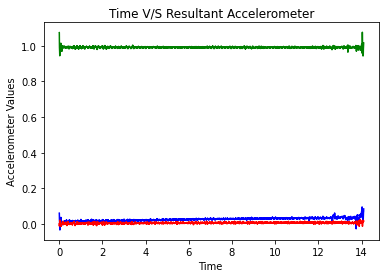

In [42]:
data = pd.read_csv('sleeping.csv') #read sleeping data

x = data['time'].tolist()
gFx = data['gFx'].tolist() #list of Accelerometer in x-direction
gFy = data['gFy'].tolist() #list of Accelerometer in y-direction
gFz = data['gFz'].tolist() #list of Accelerometer in z-direction


plt.plot(x, gFx, color="blue") #plot x-direction values
plt.plot(x, gFy, color="red") #plot y-direction values
plt.plot(x, gFz, color= "green") #plot z-direction values

plt.xlabel('Time ')

plt.ylabel('Accelerometer Values')

plt.title('Time V/S Resultant Accelerometer')
plt.show()

# Part b

In [43]:
import csv
#function to load minimum and maximum value of each position
def loaddata(filename,Acc_x,Acc_y,Acc_z,min_max_data):
    with open(filename, 'r') as data:
        datafile = csv.reader(data, delimiter=',')

        for eachrow in datafile:
            
            Acc_x.append(float(eachrow[0]))
            Acc_y.append(float(eachrow[1]))
            Acc_z.append(float(eachrow[2]))

    min_max_x = [min(Acc_x),max(Acc_x)]
    
    min_max_y = [min(Acc_y),max(Acc_y)] 
    min_max_z = [min(Acc_z),max(Acc_z)]
    min_max_data.append(min_max_x)
    min_max_data.append(min_max_y)
    min_max_data.append(min_max_z)
    

In [44]:
#Load Sleeping data
Sleep_Acc_X = []
Sleep_Acc_Y =[]
Sleep_Acc_Z=[]
sleep_result=[]

#function call to load sleep position into sleep_result array(which gives minimum and maximum value in each direction)
loaddata("Sleeping.txt",Sleep_Acc_X,Sleep_Acc_Y,Sleep_Acc_Z,sleep_result)

#Load Standing data
Stand_Acc_x=[]
Stand_Acc_y=[]
Stand_Acc_z=[]
stand_result=[]

#function call to load standing position into stand_result array(which gives minimum and maximum value in each direction)
loaddata("Standing.txt",Stand_Acc_x,Stand_Acc_y,Stand_Acc_z,stand_result)

print(stand_result)

#Load Sitting data
Sit_Acc_x=[]
Sit_Acc_y=[]
Sit_Acc_z=[]
sit_result=[]

#function call to load sitting position into sit_result array(which gives minimum and maximum value in each direction)
loaddata("Sitting.txt",Sit_Acc_x,Sit_Acc_y,Sit_Acc_z,sit_result)

print(sit_result)


[[-2.0353240966796875, -0.1461944580078125], [-9.799423217773438, -8.711883544921875], [-0.1989898681640625, 3.215576171875]]
[[-0.31488037109375, 0.0225067138671875], [-1.3336181640625, -0.9316253662109375], [9.153350830078125, 9.785064697265625]]


In [45]:
import csv

#declare array for Accelerometer in X,Y,Z directions
Acc_X = []
Acc_Y =[]
Acc_Z=[]

#loadind Testing.txt file and append all the data into particular direction in which it belongs to
with open("Testing.txt", 'r') as data:
    datafile = csv.reader(data, delimiter=',')
    for eachrow in datafile:
        Acc_X.append(float(eachrow[0]))
        Acc_Y.append(float(eachrow[1]))
        Acc_Z.append(float(eachrow[2]))
        
        
#predicting the position of the user with the help of the above data recorded.
for i in range(len(Acc_X)):
    if ((Acc_X[i] >= stand_result[0][0] and Acc_X[i] <= stand_result[0][1]) and (Acc_Y[i] >= stand_result[1][0] and Acc_Y[i] <= stand_result[1][1]) and (Acc_Z[i] >= stand_result[2][0] and Acc_Z[i] <= stand_result[2][1])):
        print("[Acc_X:",Acc_X[i],",Acc_Y: ",Acc_Y[i],",Acc_Z: ",Acc_Z[i],"] - Position: Standing")
    elif ((Acc_X[i] >= sit_result[0][0] and Acc_X[i] <= sit_result[0][1]) and (Acc_Y[i] >= sit_result[1][0] and Acc_Y[i] <= sit_result[1][1]) and (Acc_Z[i] >= sit_result[2][0] and Acc_Z[i] <= sit_result[2][1])):
        print("[Acc_X:",Acc_X[i],",Acc_Y:",Acc_Y[i],",Acc_Z:",Acc_Z[i],"] - Position: Sitting")
    elif ((Acc_X[i] >= sleep_result[0][0] and Acc_X[i] <= sleep_result[0][1]) and (Acc_Y[i] >= sleep_result[1][0] and Acc_Y[i] <= sleep_result[1][1]) and (Acc_Z[i] >= sleep_result[2][0] and Acc_Z[i] <= sleep_result[2][1])):
        print("[Acc_X:",Acc_X[i],",Acc_Y:",Acc_Y[i],",Acc_Z:",Acc_Z[i],"] - Position: Sleeping")
    else:
        print("[Acc_X:",Acc_X[i],",Acc_Y:",Acc_Y[i],",Acc_Z:",Acc_Z[i],"] - Pattern Not Recognized")

[Acc_X: -0.541015625 ,Acc_Y:  -9.770706176757812 ,Acc_Z:  0.1826629638671875 ] - Position: Standing
[Acc_X: -0.7695159912109375 ,Acc_Y:  -9.695343017578125 ,Acc_Z:  0.3980255126953125 ] - Position: Standing
[Acc_X: -1.00042724609375 ,Acc_Y:  -9.657058715820312 ,Acc_Z:  0.4877471923828125 ] - Position: Standing
[Acc_X: -1.0554656982421875 ,Acc_Y:  -9.66064453125 ,Acc_Z:  0.4398956298828125 ] - Position: Standing
[Acc_X: -0.641510009765625 ,Acc_Y:  -9.663040161132812 ,Acc_Z:  0.5152740478515625 ] - Position: Standing
[Acc_X: -0.7611541748046875 ,Acc_Y:  -9.6546630859375 ,Acc_Z:  0.652862548828125 ] - Position: Standing
[Acc_X: -0.6522674560546875 ,Acc_Y:  -9.587661743164062 ,Acc_Z:  0.5990142822265625 ] - Position: Standing
[Acc_X: -0.518280029296875 ,Acc_Y:  -9.787460327148438 ,Acc_Z:  0.8406982421875 ] - Position: Standing
[Acc_X: -0.959747314453125 ,Acc_Y:  -9.624755859375 ,Acc_Z:  0.53680419921875 ] - Position: Standing
[Acc_X: -0.9430084228515625 ,Acc_Y:  -9.7264404296875 ,Acc_Z:  0

In the predicted output shown here, this code is able to predict all the position and where Pattern Not Recognized are shown is the time of changing the position between sleeping,standing and sitting.